**XGBoost**

* Stands for eXtreme Gradient Boosted trees
* Booster is an Ensemble learning method
* Hyperparameters:
    * Booster: gbtree or gblinear
    * Objective (multi: softmax, multi:softprob)
    * Eta (learning rate - adjusts weights on each step): default value is 0.3, lower value gives better results
    * Max_dept (depth of the tree)
    * Min_child_weight: To control overfitting but setting it too high will underfit
    * others

Let's experiment using the Iris data set. This data set includes the width and length of the <b>petals</b> and <b>sepals</b> of many Iris flowers, and the specific species of Iris the flower belongs to. Our challenge is to predict the species of a flower sample just based on the sizes of its petals. We'll revisit this data set later when we talk about principal component analysis too.

In [124]:
from sklearn.datasets import load_iris

iris = load_iris()

numSamples, numFeatures = iris.data.shape
print(numSamples)
print(numFeatures)
print(list(iris.target_names))

150
4
['setosa', 'versicolor', 'virginica']


In [111]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [112]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Let's divide our data into 80% to train it with and the remaining 20% to test our model.

The features in this case will be the petal sizes, as X.

The labels in this case will be the species, as y.

In [113]:
from sklearn.model_selection import train_test_split

X = iris.data # features data
y = iris.target # labels data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now, we load up XGBoost, and convert our data in DMatrix format it expects. One for the training data and one for the testing data.

In [114]:
import xgboost as xgb

train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

Now, we need to define the Hyperparameters.

In [115]:
param = {
    "max_depth" : 4,
    "eta" : 0.3, # default
    "objective" : "multi:softmax",
    "num_class" : 3 # only 3 sub-species to choose from
    }
epochs = 2 # no of iterations, how many times we want to run this algorithm over

Let's train our model using the parameters as a first guess.

In [116]:
model = xgb.train(param, train, epochs)

Now we'll use the trained model to predict classifications for the data we set aside for testing.

Each classification number we get back corresponds to a specific species of Iris.

In [117]:
predictions = model.predict(test)

In [118]:
print(predictions)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


Let's measure the accuracy on the test data.

In [119]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, predictions))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



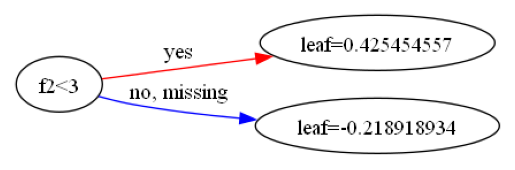

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [120]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from xgboost import plot_tree
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()

# Split the dataset
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Convert data to DMatrix format
train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost
param = {
    "max_depth": 4,
    "eta": 0.3,  # default
    "objective": "multi:softmax",
    "num_class": 3  # only 3 sub-species to choose from
}

epochs = 2  # no of iterations, how many times we want to run this algorithm over

# Train the XGBoost model
model = xgb.train(param, train, epochs)

# Visualize one of the trees in the model
plot_tree(model, num_trees=0, rankdir='LR')  # Change num_trees to visualize a different tree if needed
plt.show()

# Make predictions
predictions = model.predict(test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, predictions))


Diving into XGBoost may require further learning about gradient boosting concepts, regularization techniques, hyperparameter tuning, optimization techniques, and model interpretability.

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Read the CSV file into a DataFrame
input_file = "../day_110_adaboost/machinedata.csv"
df = pd.read_csv(input_file)

# dropping the columns for simplification
df.drop(columns=["Optical_Sensor", "Airflow_Sensor", "Current_Sensor"], axis=1, inplace=True)

# Convert boolean columns to integers (if needed)
df["Capacitive_Sensor"] = df["Capacitive_Sensor"].astype(int)
df["Inductive_Sensor"] = df["Inductive_Sensor"].astype(int)
df["Failure"] = df["Failure"].astype(int)

# Separate features and target variable
features = list(df.columns[:3])
X = df[features]  # Features
y = df["Failure"]  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Convert data to DMatrix format with specifying feature names
train = xgb.DMatrix(data=X_train, label=y_train, feature_names=features)
test = xgb.DMatrix(data=X_test, label=y_test, feature_names=features)

# Remove "num_class" parameter or set it to 1 (since it's a binary classification task)
param = {
    "max_depth": 6,
    "eta": 0.1,
    "objective": "binary:logistic",
    "eval_metric": "error"
}

epochs = 2  # no of iterations, how many times we want to run this algorithm over

# Train the XGBoost model
model = xgb.train(params=param, dtrain=train, num_boost_round=epochs)

# Make predictions
predictions = model.predict(data=test)

# Convert probabilities to binary predictions
predictions_binary = [1 if p > 0.5 else 0 for p in predictions]

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions_binary)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.50
